In [65]:
import pandas as pd
import opendatasets as od
import os 
import csv 
import matplotlib.pyplot as plt
import numpy as np

In [66]:
dataset=('https://www.kaggle.com/datasets/satpreetmakhija/netflix-movies-and-tv-shows-2021')

In [67]:
od.download(dataset)

Skipping, found downloaded files in ".\netflix-movies-and-tv-shows-2021" (use force=True to force download)


In [68]:
data_dir=('.\netflix-movies-and-tv-shows-2021')

In [69]:
#load data
netflix_data21 = "netflix-movies-and-tv-shows-2021/netflixData.csv"

In [70]:
current_netflix_data = pd.read_csv(netflix_data21)

In [71]:
# new_nf_df = current_netflix_data.drop(["Director"], axis=1)
new_nf_df = current_netflix_data
# droped na values
nf_df = new_nf_df.dropna(subset=['Director', 'Date Added', 'Cast', 'Imdb Score', 'Production Country'])
nf_df.head(100)

,Show Id,Title,Description,Director,Genres,Cast,Production Country,Release Date,Rating,Duration,Imdb Score,Content Type,Date Added
1,e2ef4e91-fb25-42ab-b485-be8e3b23dedb,#Alive,"As a grisly virus rampages a city, a lone man ...",Cho Il,"Horror Movies, International Movies, Thrillers","Yoo Ah-in, Park Shin-hye",South Korea,2020.0,TV-MA,99 min,6.2/10,Movie,"September 8, 2020"
2,b01b73b7-81f6-47a7-86d8-acb63080d525,#AnneFrank - Parallel Stories,"Through her diary, Anne Frank's story is retol...","Sabina Fedeli, Anna Migotto","Documentaries, International Movies","Helen Mirren, Gengher Gatti",Italy,2019.0,TV-14,95 min,6.4/10,Movie,"July 1, 2020"
5,c293788a-41f7-49a3-a7fc-005ea33bce2b,#FriendButMarried,"Pining for his high school crush for years, a ...",Rako Prijanto,"Dramas, International Movies, Romantic Movies","Adipati Dolken, Vanesha Prescilla, Rendi Jhon,...",Indonesia,2018.0,TV-G,102 min,7.0/10,Movie,"May 21, 2020"
6,0555e67e-f624-4a05-93e4-55c117d0056d,#FriendButMarried 2,As Ayu and Ditto finally transition from best ...,Rako Prijanto,"Dramas, International Movies, Romantic Movies","Adipati Dolken, Mawar de Jongh, Sari Nila, Von...",Indonesia,2020.0,TV-G,104 min,7.0/10,Movie,"June 28, 2020"
7,c844460f-6178-4f87-929e-80816c74ca35,#realityhigh,When nerdy high schooler Dani finally attracts...,Fernando Lebrija,Comedies,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017.0,TV-14,99 min,5.1/10,Movie,"September 8, 2017"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,2710f5ff-3f8c-4a6a-848d-7860756147aa,A Twelve Year Night,Future Uruguayan president José Mujica and his...,Álvaro Brechner,"Dramas, International Movies","Antonio de la Torre, Chino Darín, Alfonso Tort...","Uruguay, Argentina, Spain",2018.0,TV-MA,122 min,7.6/10,Movie,"December 28, 2018"
161,bf5b2873-f71b-4b87-9461-297e109e77c6,A Very Country Christmas,When an unfulfilled country music star hides o...,Justin G. Dyck,"Music & Musicals, Romantic Movies","Bea Santos, Greyston Holt, Greg Vaughan, Deana...","United States, Canada",2017.0,TV-G,84 min,5.9/10,Movie,"November 15, 2020"
162,082d9f18-134f-4ecb-b5ca-b2014d88669d,A Very Murray Christmas,Bill Murray rounds up an all-star cast for an ...,Sofia Coppola,"Comedies, Music & Musicals","Bill Murray, Miley Cyrus, George Clooney, Chri...",United States,2015.0,TV-14,57 min,5.4/10,Movie,"December 4, 2015"
164,06e79a15-a1a6-472a-ac77-634883fbcb3f,A Very Special Love,After landing a job working for her longtime c...,Cathy Garcia-Molina,"International Movies, Romantic Movies","John Lloyd Cruz, Sarah Geronimo, Dante Rivero,...",Philippines,2008.0,TV-G,107 min,6.9/10,Movie,"November 12, 2020"


In [72]:
nf_df.columns

Index(['Show Id', 'Title', 'Description', 'Director', 'Genres', 'Cast',
       'Production Country', 'Release Date', 'Rating', 'Duration',
       'Imdb Score', 'Content Type', 'Date Added'],
      dtype='object')

In [73]:
print(len(nf_df))

3260


In [74]:
nf_df.isnull().sum()

Show Id               0
Title                 0
Description           0
Director              0
Genres                0
Cast                  0
Production Country    0
Release Date          0
Rating                0
Duration              0
Imdb Score            0
Content Type          0
Date Added            0
dtype: int64

"""
<br>(1. How current are the release dates of these titles?)
<br>2. Do movies or tv shows have a higher average vote?*
<br>3. How many countries have productions on Netflix?
<br>4. Which countries have the highest rated productions?*
<br>5. What are all the current genres offered?*
<br>6. How many productions in each genre category per country?*
<br>7. How many comedies are TV shows and how many are movies?
<br>8. Which country is releasing the most current comedies?*
<br>9. What are comedies generally rated across these productions?
<br>10.How many comedies have been produced from each country? And are these movies or tv shows? How long (duration) are they?*
"""

In [75]:
# current_netflix_data["Release Date"].unique

In [76]:
#dropping columns
new_reduced_df = nf_df.drop(['Cast', 'Director', 'Description'], axis = 1)
new_reduced = new_reduced_df.reset_index(drop=True)
new_reduced

,Show Id,Title,Genres,Production Country,Release Date,Rating,Duration,Imdb Score,Content Type,Date Added
0,e2ef4e91-fb25-42ab-b485-be8e3b23dedb,#Alive,"Horror Movies, International Movies, Thrillers",South Korea,2020.0,TV-MA,99 min,6.2/10,Movie,"September 8, 2020"
1,b01b73b7-81f6-47a7-86d8-acb63080d525,#AnneFrank - Parallel Stories,"Documentaries, International Movies",Italy,2019.0,TV-14,95 min,6.4/10,Movie,"July 1, 2020"
2,c293788a-41f7-49a3-a7fc-005ea33bce2b,#FriendButMarried,"Dramas, International Movies, Romantic Movies",Indonesia,2018.0,TV-G,102 min,7.0/10,Movie,"May 21, 2020"
3,0555e67e-f624-4a05-93e4-55c117d0056d,#FriendButMarried 2,"Dramas, International Movies, Romantic Movies",Indonesia,2020.0,TV-G,104 min,7.0/10,Movie,"June 28, 2020"
4,c844460f-6178-4f87-929e-80816c74ca35,#realityhigh,Comedies,United States,2017.0,TV-14,99 min,5.1/10,Movie,"September 8, 2017"
...,...,...,...,...,...,...,...,...,...,...
3255,ab343fbd-1064-405d-837c-8e99a2d0c543,Zoo,"Dramas, Independent Movies, International Movies",India,2018.0,TV-MA,94 min,5.8/10,Movie,"July 1, 2018"
3256,309b0d7e-357b-45ce-b1cf-617b4c3593d5,Zoot Suit,"Cult Movies, Dramas, Music & Musicals",United States,1981.0,R,103 min,7.0/10,Movie,"April 15, 2021"
3257,a006d6c6-e213-4a8b-9f57-b941e822d0c5,Zozo,"Dramas, International Movies","Sweden, Czech Republic, United Kingdom, Denmar...",2005.0,TV-MA,99 min,6.7/10,Movie,"October 19, 2020"
3258,62b8b682-f191-4c10-aa04-32319329bd8d,الف مبروك,"Comedies, Dramas, International Movies",Egypt,2009.0,TV-14,115 min,7.4/10,Movie,"April 25, 2020"


In [77]:
#totals
#content = new_reduced.groupby(["Content Type"]).count()
content = new_reduced["Content Type"].value_counts()
content
year = new_reduced["Release Date"].value_counts()
year
rating = new_reduced["Rating"].value_counts()
rating

TV-MA    1318
TV-14     833
R         370
TV-PG     245
PG-13     218
PG        118
TV-G       54
TV-Y       49
TV-Y7      40
G          14
NC-17       1
Name: Rating, dtype: int64

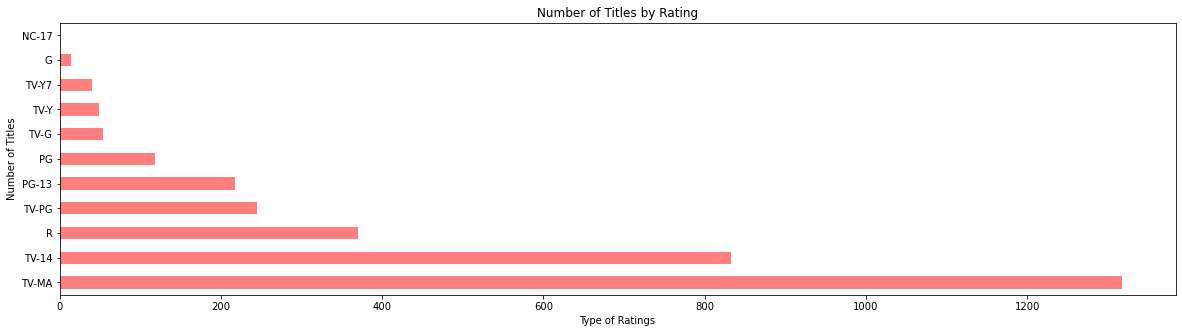

In [78]:
rating.plot(kind = "barh", alpha = .50, figsize =(20,5), color = "red")
plt.xlabel("Type of Ratings")
plt.ylabel("Number of Titles")
plt.title("Number of Titles by Rating")
plt.savefig("Number of Titles by Rating.jpg")
plt.show()

In [79]:
#from datetime import datetime
import datetime
import time
new_reduced['Date Added'] = pd.to_datetime(new_reduced['Date Added'])
new_reduced['Date Added'] =new_reduced['Date Added'].dt.strftime('%Y')
new_reduced

,Show Id,Title,Genres,Production Country,Release Date,Rating,Duration,Imdb Score,Content Type,Date Added
0,e2ef4e91-fb25-42ab-b485-be8e3b23dedb,#Alive,"Horror Movies, International Movies, Thrillers",South Korea,2020.0,TV-MA,99 min,6.2/10,Movie,2020
1,b01b73b7-81f6-47a7-86d8-acb63080d525,#AnneFrank - Parallel Stories,"Documentaries, International Movies",Italy,2019.0,TV-14,95 min,6.4/10,Movie,2020
2,c293788a-41f7-49a3-a7fc-005ea33bce2b,#FriendButMarried,"Dramas, International Movies, Romantic Movies",Indonesia,2018.0,TV-G,102 min,7.0/10,Movie,2020
3,0555e67e-f624-4a05-93e4-55c117d0056d,#FriendButMarried 2,"Dramas, International Movies, Romantic Movies",Indonesia,2020.0,TV-G,104 min,7.0/10,Movie,2020
4,c844460f-6178-4f87-929e-80816c74ca35,#realityhigh,Comedies,United States,2017.0,TV-14,99 min,5.1/10,Movie,2017
...,...,...,...,...,...,...,...,...,...,...
3255,ab343fbd-1064-405d-837c-8e99a2d0c543,Zoo,"Dramas, Independent Movies, International Movies",India,2018.0,TV-MA,94 min,5.8/10,Movie,2018
3256,309b0d7e-357b-45ce-b1cf-617b4c3593d5,Zoot Suit,"Cult Movies, Dramas, Music & Musicals",United States,1981.0,R,103 min,7.0/10,Movie,2021
3257,a006d6c6-e213-4a8b-9f57-b941e822d0c5,Zozo,"Dramas, International Movies","Sweden, Czech Republic, United Kingdom, Denmar...",2005.0,TV-MA,99 min,6.7/10,Movie,2020
3258,62b8b682-f191-4c10-aa04-32319329bd8d,الف مبروك,"Comedies, Dramas, International Movies",Egypt,2009.0,TV-14,115 min,7.4/10,Movie,2020


In [80]:
new_reduced[['IMDB Score', 'delete']] = new_reduced['Imdb Score'].str.split('/', expand=True)
#new_reduced.dtypes

In [81]:
new_reduced[['Duration (min)', 'deletemin']] = new_reduced['Duration'].str.split(' ', expand=True)
new_reduced["Release Date"]=new_reduced["Release Date"].astype("int")
new_reduced["IMDB Score"]=new_reduced["IMDB Score"].astype("float")
new_reduced["Duration (min)"]=new_reduced["Duration (min)"].astype("int")
new_reduced

,Show Id,Title,Genres,Production Country,Release Date,Rating,Duration,Imdb Score,Content Type,Date Added,IMDB Score,delete,Duration (min),deletemin
0,e2ef4e91-fb25-42ab-b485-be8e3b23dedb,#Alive,"Horror Movies, International Movies, Thrillers",South Korea,2020,TV-MA,99 min,6.2/10,Movie,2020,6.2,10,99,min
1,b01b73b7-81f6-47a7-86d8-acb63080d525,#AnneFrank - Parallel Stories,"Documentaries, International Movies",Italy,2019,TV-14,95 min,6.4/10,Movie,2020,6.4,10,95,min
2,c293788a-41f7-49a3-a7fc-005ea33bce2b,#FriendButMarried,"Dramas, International Movies, Romantic Movies",Indonesia,2018,TV-G,102 min,7.0/10,Movie,2020,7.0,10,102,min
3,0555e67e-f624-4a05-93e4-55c117d0056d,#FriendButMarried 2,"Dramas, International Movies, Romantic Movies",Indonesia,2020,TV-G,104 min,7.0/10,Movie,2020,7.0,10,104,min
4,c844460f-6178-4f87-929e-80816c74ca35,#realityhigh,Comedies,United States,2017,TV-14,99 min,5.1/10,Movie,2017,5.1,10,99,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3255,ab343fbd-1064-405d-837c-8e99a2d0c543,Zoo,"Dramas, Independent Movies, International Movies",India,2018,TV-MA,94 min,5.8/10,Movie,2018,5.8,10,94,min
3256,309b0d7e-357b-45ce-b1cf-617b4c3593d5,Zoot Suit,"Cult Movies, Dramas, Music & Musicals",United States,1981,R,103 min,7.0/10,Movie,2021,7.0,10,103,min
3257,a006d6c6-e213-4a8b-9f57-b941e822d0c5,Zozo,"Dramas, International Movies","Sweden, Czech Republic, United Kingdom, Denmar...",2005,TV-MA,99 min,6.7/10,Movie,2020,6.7,10,99,min
3258,62b8b682-f191-4c10-aa04-32319329bd8d,الف مبروك,"Comedies, Dramas, International Movies",Egypt,2009,TV-14,115 min,7.4/10,Movie,2020,7.4,10,115,min


In [82]:
final_nf_2021 = new_reduced.drop(['delete', 'deletemin', 'Imdb Score', 'Duration','Show Id'], axis = 1)
final_nf_2021

,Title,Genres,Production Country,Release Date,Rating,Content Type,Date Added,IMDB Score,Duration (min)
0,#Alive,"Horror Movies, International Movies, Thrillers",South Korea,2020,TV-MA,Movie,2020,6.2,99
1,#AnneFrank - Parallel Stories,"Documentaries, International Movies",Italy,2019,TV-14,Movie,2020,6.4,95
2,#FriendButMarried,"Dramas, International Movies, Romantic Movies",Indonesia,2018,TV-G,Movie,2020,7.0,102
3,#FriendButMarried 2,"Dramas, International Movies, Romantic Movies",Indonesia,2020,TV-G,Movie,2020,7.0,104
4,#realityhigh,Comedies,United States,2017,TV-14,Movie,2017,5.1,99
...,...,...,...,...,...,...,...,...,...
3255,Zoo,"Dramas, Independent Movies, International Movies",India,2018,TV-MA,Movie,2018,5.8,94
3256,Zoot Suit,"Cult Movies, Dramas, Music & Musicals",United States,1981,R,Movie,2021,7.0,103
3257,Zozo,"Dramas, International Movies","Sweden, Czech Republic, United Kingdom, Denmar...",2005,TV-MA,Movie,2020,6.7,99
3258,الف مبروك,"Comedies, Dramas, International Movies",Egypt,2009,TV-14,Movie,2020,7.4,115


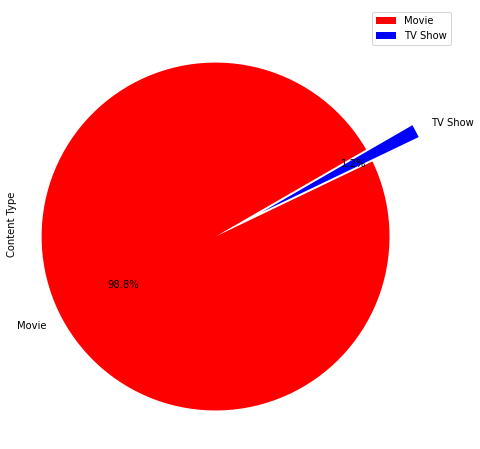

In [115]:
content = final_nf_2021["Content Type"].value_counts()
content
content.plot.pie(y= 'Content Type', figsize = (8,8), explode = (0.15, 0.15), autopct='%1.1f%%',colors=['red','blue'], startangle=30 )
plt.savefig("Content Type _Pie.png") 
plt.legend();


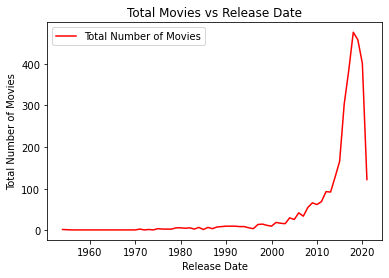

In [113]:
year = final_nf_2021["Release Date"].value_counts()
year
year_counts = final_nf_2021.groupby("Release Date").count()

pandas_line = year_counts[["Title"]].rename(columns = {"Title":"Total Number of Movies"})
pandas_line.plot(kind = "line", color = "red")
plt.ylabel("Total Number of Movies")
plt.title("Total Movies vs Release Date")
plt.savefig("Total Movies vs Release Date.jpg")
plt.show()

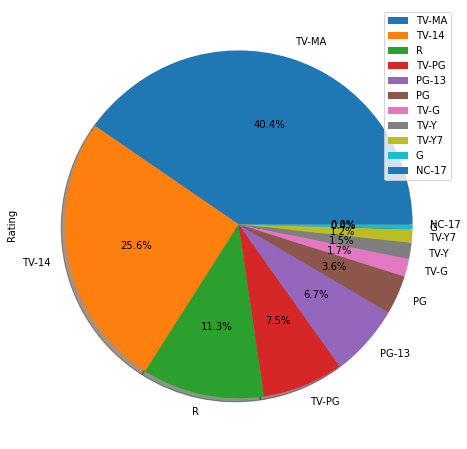

In [111]:
rating = final_nf_2021["Rating"].value_counts()
rating.plot.pie(shadow = True, figsize = (8,8), autopct='%1.1f%%')
plt.savefig('Ratings_pie.png')
plt.legend()


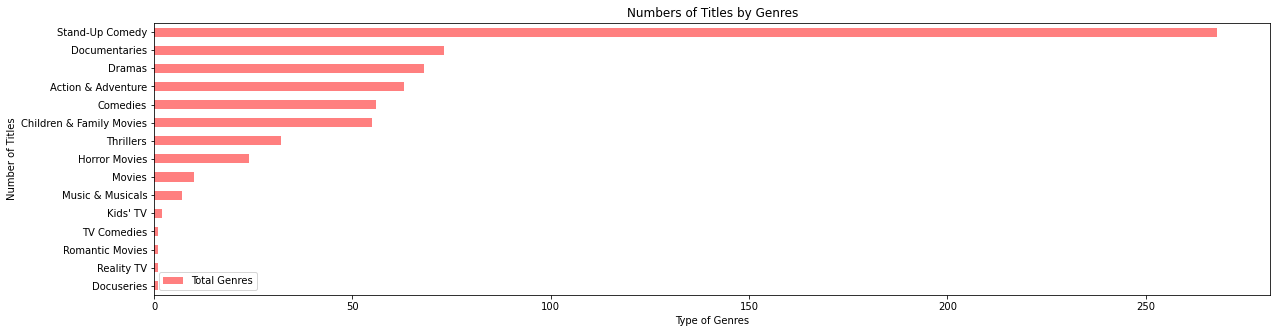

In [55]:
#pokemon_games = df.loc[df['Name'].str.contains("pokemon", case=False)]
final_Production_countries = final_nf_2021.loc[final_nf_2021["Genres"].str.contains(",")== False]
final_Production_countries
countries_count = final_Production_countries.groupby("Genres").count()
group_data= final_Production_countries.groupby("Genres")
countries_count_df = pd.DataFrame({"Total Genres":group_data['Genres'].count()})
countries_count_df_sort = countries_count_df.sort_values(by=['Total Genres'], ascending=True)
countries_count_df_sort
pandas_bar = countries_count_df_sort[["Total Genres"]].rename(columns = {"Title":"Total Number of Movies"})
pandas_bar = countries_count_df_sort[["Total Genres"]]
pandas_bar.plot(kind = "barh", alpha = .50, figsize =(20,5), color = "red")
plt.xlabel("Type of Genres")
plt.ylabel("Number of Titles")
plt.title("Numbers of Titles by Genres")
plt.savefig("Numbers of Titles by Genres.jpg")
plt.show()

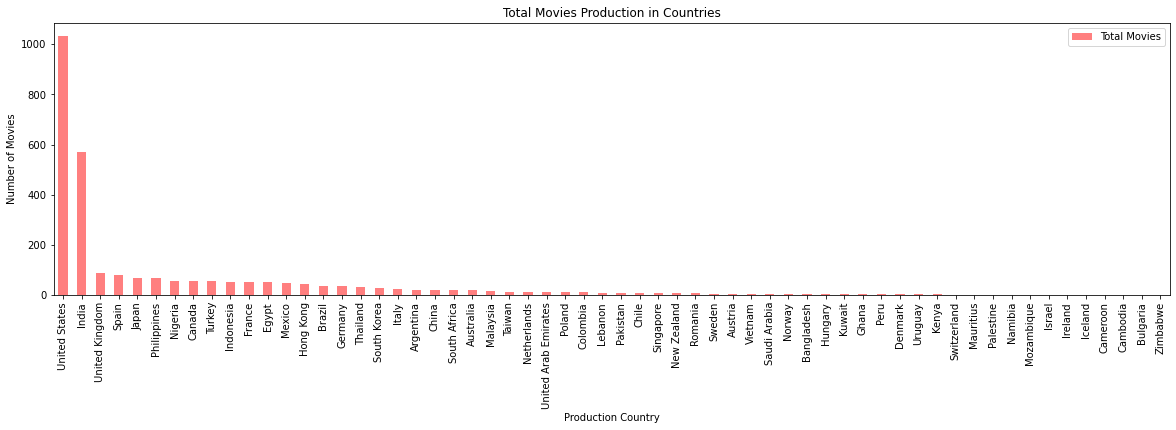

In [98]:
#pokemon_games = df.loc[df['Name'].str.contains("pokemon", case=False)]
final_Production_countries = final_nf_2021.loc[final_nf_2021["Production Country"].str.contains(",")== False]
final_Production_countries
countries_count = final_Production_countries.groupby("Production Country").count()
group_data= final_Production_countries.groupby("Production Country")
countries_count_df = pd.DataFrame({"Total Movies":group_data['Production Country'].count()})
countries_count_df_sort = countries_count_df.sort_values(by=['Total Movies'], ascending=False)
countries_count_df_sort
pandas_bar = countries_count_df_sort[["Total Movies"]].rename(columns = {"Title":"Total Number of Movies"})
pandas_bar = countries_count_df_sort[["Total Movies"]]

pandas_bar.plot(kind = "bar", alpha = .50, figsize =(20,5), color = "red")

plt.ylabel("Number of Movies")
plt.title("Total Movies Production in Countries")
plt.savefig("Total Movies Production in Countries.jpg")
plt.show()

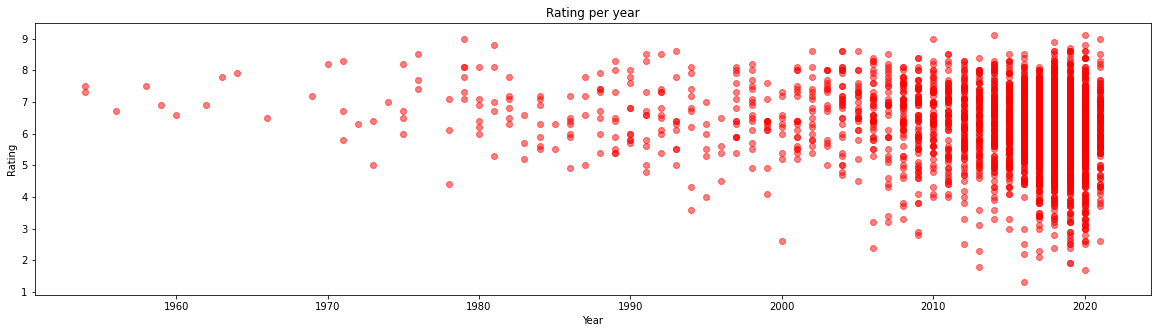

In [57]:
x = final_nf_2021["Release Date"]
y = final_nf_2021["IMDB Score"]
plt.figure(figsize=(20, 5))
plt.scatter(x, y, alpha=0.5, color = "red")
#plt.yticks(np.arange(min(0), max(10)+1, 1.0))
plt.xlabel('Year')
plt.ylabel('Rating')
plt.title('Rating per year')
plt.savefig("Rating per year.jpg")
plt.show()

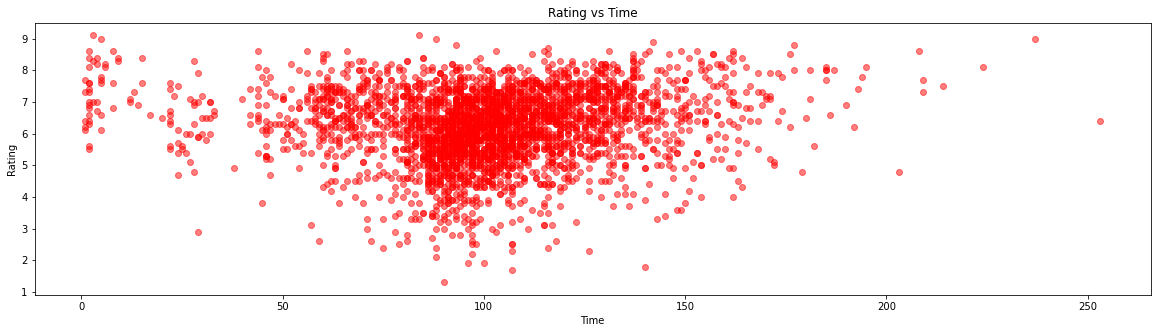

In [58]:
x = final_nf_2021["Duration (min)"]
y = final_nf_2021["IMDB Score"]
plt.figure(figsize=(20, 5))
plt.scatter(x, y, alpha=0.5, color="red")
#plt.yticks(np.arange(min(0), max(10)+1, 1.0))
plt.xlabel('Time')
plt.ylabel('Rating')
plt.title('Rating vs Time')
plt.savefig("Rating vs Time.jpg")
plt.show()